In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname = path).get_name()
rc('font', family = font_name)

file_path = './ref/소상공인지역별실적및전망_20250305.csv'
ori = pd.read_csv(file_path, encoding = 'EUC-KR')
ori

,시점,지역별(1),체감,전망
0,2018.01,제주,64.0,88.0
1,2018.02,제주,65.3,85.3
2,2018.03,제주,73.3,98.7
3,2018.04,제주,76.7,106.0
4,2018.05,제주,80.0,104.7
...,...,...,...,...
67,2023.08,제주,54.8,82.7
68,2023.09,제주,68.5,95.2
69,2023.10,제주,71.4,95.2
70,2023.11,제주,71.4,92.9


In [25]:
data = ori.copy()
data

,시점,지역별(1),체감,전망
0,2018.01,제주,64.0,88.0
1,2018.02,제주,65.3,85.3
2,2018.03,제주,73.3,98.7
3,2018.04,제주,76.7,106.0
4,2018.05,제주,80.0,104.7
...,...,...,...,...
67,2023.08,제주,54.8,82.7
68,2023.09,제주,68.5,95.2
69,2023.10,제주,71.4,95.2
70,2023.11,제주,71.4,92.9


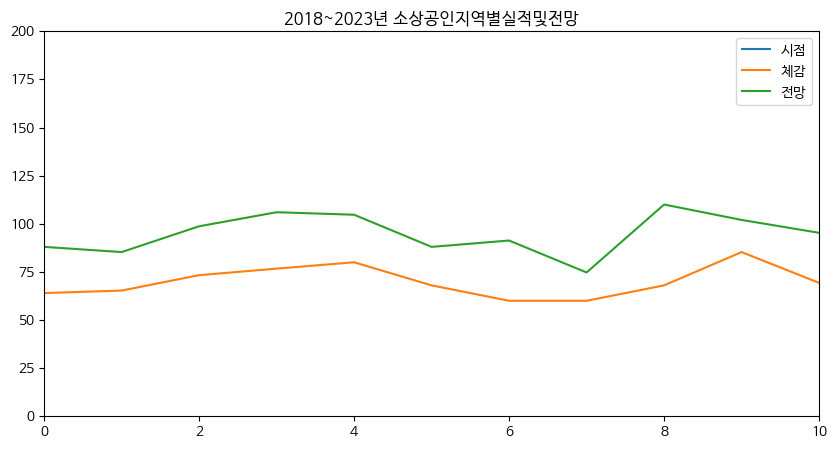

In [33]:
data.plot(figsize = (10, 5), title = '2018~2023년 소상공인지역별실적및전망')

# x, y 축의 범위 수정
plt.xlim(0, 10)  # x축 범위를 2에서 8로 설정
plt.ylim(0, 200)  # y축 범위를 -1에서 1로 설정
plt.savefig('./chart/현재.png')

In [12]:
ex1_data = data.copy()
ex1_data = ex1_data.groupby('시점')['체감'].sum().reset_index(name = '체감')
ex1_data['시점'] = pd.to_datetime(ex1_data['시점'], format = '%Y')
ex1_data = ex1_data.rename(columns = {'시점' : 'ds', '체감' : 'y'})
ex1_data

,ds,y
0,2018-01-01,64.0
1,2018-01-01,65.3
2,2018-01-01,73.3
3,2018-01-01,76.7
4,2018-01-01,80.0
...,...,...
67,2023-01-01,54.8
68,2023-01-01,68.5
69,2023-01-01,71.4
70,2023-01-01,71.4


In [13]:
ex2_data = data.copy()
ex2_data = ex2_data.groupby('시점')['전망'].sum().reset_index(name = '전망')
ex2_data['시점'] = pd.to_datetime(ex2_data['시점'], format = '%Y')
ex2_data = ex2_data.rename(columns = {'시점' : 'ds', '전망' : 'y'})
ex2_data

,ds,y
0,2018-01-01,88.0
1,2018-01-01,85.3
2,2018-01-01,98.7
3,2018-01-01,106.0
4,2018-01-01,104.7
...,...,...
67,2023-01-01,82.7
68,2023-01-01,95.2
69,2023-01-01,95.2
70,2023-01-01,92.9


In [6]:
from prophet import Prophet

In [14]:
m = Prophet()
m.fit(ex1_data)

15:08:22 - cmdstanpy - INFO - Chain [1] start processing
15:08:22 - cmdstanpy - INFO - Chain [1] done processing


C:\Dev\Lang\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


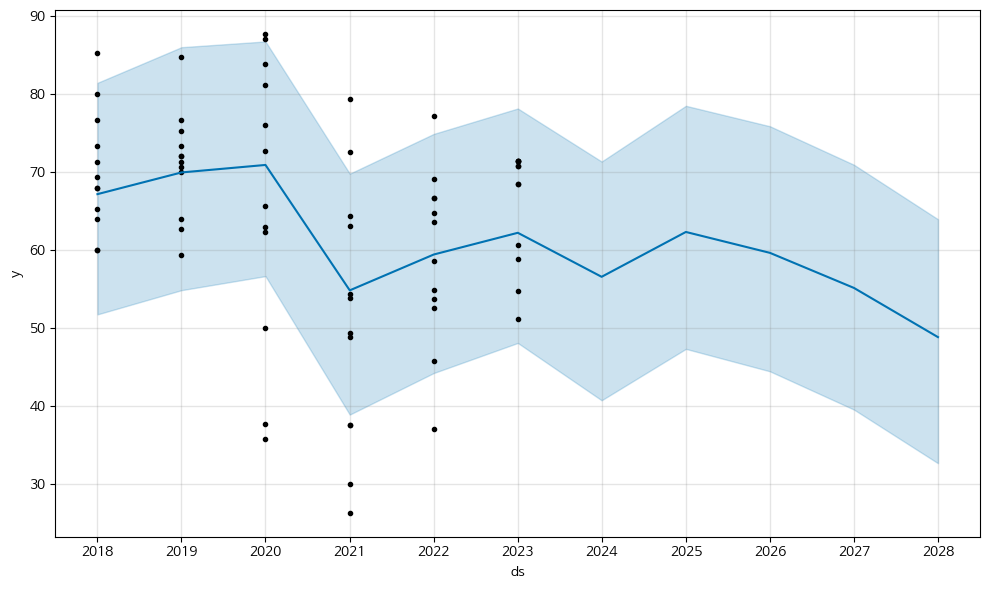

<Figure size 1000x1500 with 0 Axes>

In [15]:
future = m.make_future_dataframe(periods = 5, freq = 'Y')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/체감.png')
plt.figure(figsize = (10, 15))
plt.show()

In [16]:
m = Prophet()
m.fit(ex2_data)

15:08:27 - cmdstanpy - INFO - Chain [1] start processing
15:08:27 - cmdstanpy - INFO - Chain [1] done processing


C:\Dev\Lang\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


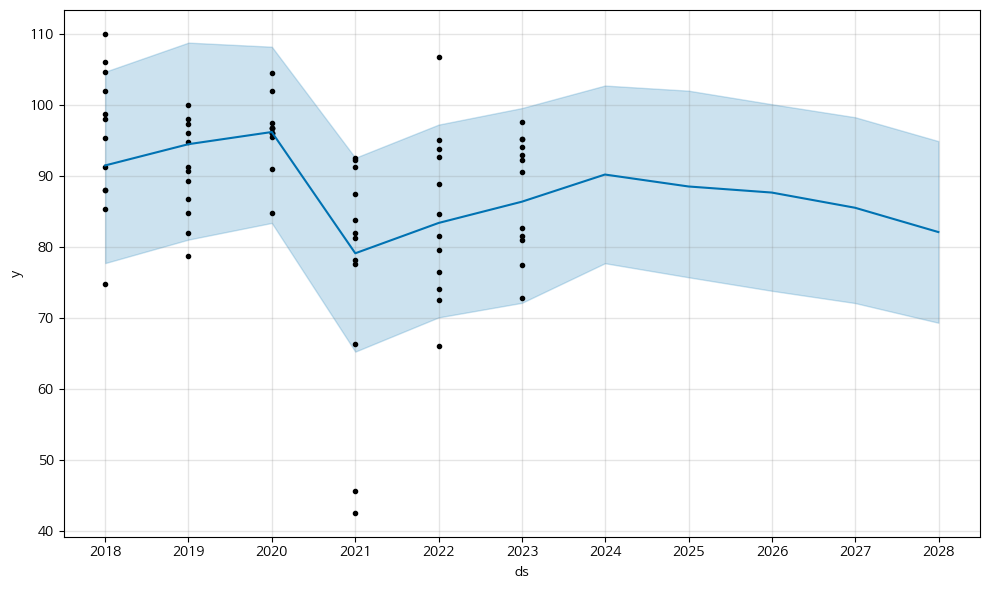

<Figure size 1000x1500 with 0 Axes>

In [17]:
future = m.make_future_dataframe(periods = 5, freq = 'Y')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/전망.png')
plt.figure(figsize = (10, 15))
plt.show()

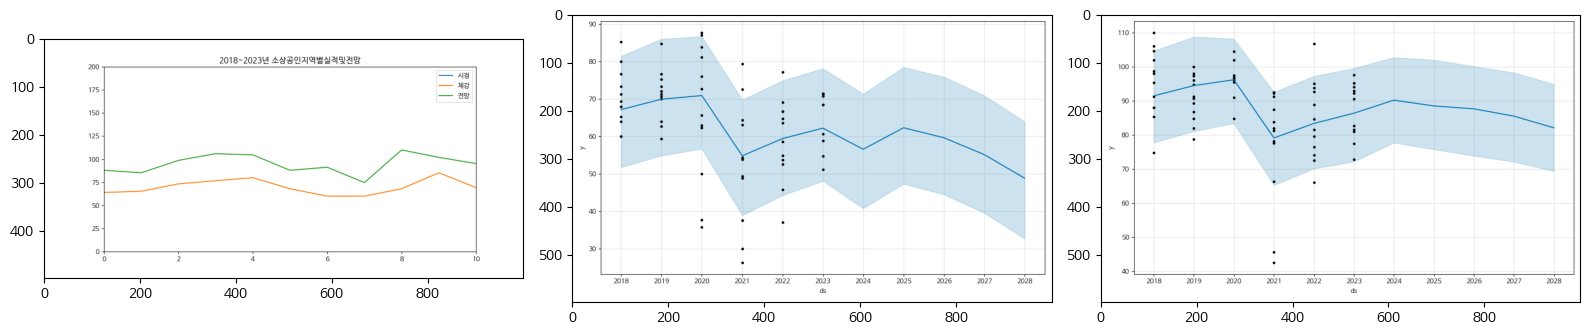

In [34]:
fig, axs = plt.subplots(1, 3, figsize = (16, 8))
import matplotlib.image as mpimg

img1 = mpimg.imread('./chart/현재.png')
img2 = mpimg.imread('./chart/체감.png')
img3 = mpimg.imread('./chart/전망.png')

axins = fig.add_axes(axs[0])
axins.imshow(img1)
axins = fig.add_axes(axs[1])
axins.imshow(img2)
axins = fig.add_axes(axs[2])
axins.imshow(img3)
plt.tight_layout()
plt.show()